# Project: Health Insurance Premium Prediction

# INTRODUCTION

## PROBLEM STATEMENT

Health insurance premium is expensive in the United States. Many Americans are concerned about health insurance costs. Almost 40 percent of Americans would discard their health insurance altogether and chose to go uninsured instead of paying high premiums if the health insurance premium exceeded what they considered reasonable ([source](https://healthpayerintelligence.com/news/health-insurance-is-expensive-but-americans-intend-to-keep-their-plans-in-2023)). Hence, in this project, I am tasked to develop a model to help Americans to predict health insurance premium.

## BACKGROUND

Health insurance is a contract, represented by a policy, designed to help offset the costs of medical treatment by covering a portion of the professional and hospital fees incurred on the policyholders, who are most likely to be insureds. According to the U.S government’s health insurance exchange website HealthCare.gov, health insurance coverage comes in several forms aimed at meeting the varying needs of policyholders. These are:
- Exclusive Provider Organization (EPO): services in this plan are covered only if the doctors, specialists, or hospitals are in the plan’s network – except in cases of emergency.
- Health Maintenance Organization (HMO): coverage in this plan is limited to care from doctors who work for or are contracted with the HMO. Generally, policies do not cover out-of-network care except in an emergency. Likewise, plans may require that a policyholder to live or work in its service area to be eligible for coverage. Typically, HMOs provide integrated care and focus on prevention and wellness.
- Point of Service (POS): payment in this plan is lesser if policyholders access doctors, hospitals, and other healthcare providers belonging to the plan’s network. Nonetheless, insured is required to get a referral from their primary care doctor for them to see a specialist.
- Preferred Provider Organization (PPO): payment in this plan is lesser for healthcare if policyholders choose to get treatment from providers in the plan’s network. However, policyholders can pay additional cost to access doctors, hospitals, and providers outside of the network without a referral 

Under the healthcare law, insurance companies can only account for five factors when determining premiums. These are:
- Age: health insurance premiums are higher for older people than for younger ones.
- Location: health insurance rates may vary due to competition, state, local regulations, and cost of living.
- Tobacco use: tobacco users pay higher health insurance premium compared to those who do not smoke.
- Individual vs. family enrollment: plan that also covers a spouse and dependents are more costly than plan that does not cover spouse and dependents.
- Plan category: plan categories Bronze, Silver, Gold, and Platinum have an effect on premium prices.

According to the latest marketplace benchmark premiums from the Kaiser Family Foundation, health insurance premiums across the US cost an average of $438 monthly per person and this can be a steep price to pay for some American families ([source](https://www.insurancebusinessmag.com/us/news/healthcare/a-guide-to-finding-the-best-affordable-health-insurance-plan-422601.aspx#:~:text=Health%20insurance%20premiums%20across%20the,pay%20for%20some%20American%20families.)).

## Dataset

Dataset below is used for analysis and is obtained from [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance):

| Dataset | Description |
|---|---|
| insurance.csv | Contains data relating to age of primary beneficiary, insurance contractor gender, body mass index (ideally 18.5 to 24.9), number of children covered by health insurance / number of dependents covered by health insurance, smoking status, beneficiary's residential area in the US, northeast, southeast, southwest, northwest; and individual medical costs billed by health insurance.

This dataset consists of 7 columns and 1,337 rows with health insurance records.

## TABLE OF CONTENTS

[(1) Understanding Data](#1.-Understanding-Data) <br>
[(2) Preprocessing](#2.-Preprocessing) <br>
[(3) Modelling](#3.-Modelling)<br>
[(4) Conclusion](#4.-Conclusion)<br>
[(5) Recommendations](#5.-Recommendations)<br>

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

### Import Data

In [2]:
# Read data from csv.
medical_dataframe = pd.read_csv("./datasets/insurance.csv")

# 1. Understanding Data

### Data Overview

In [3]:
# Summary of dataFrame.
print("***************************************")
print("     Summary of Insurance Dataframe    ")
print("***************************************")
medical_dataframe.info()

***************************************
     Summary of Insurance Dataframe    
***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation**:
- There are 7 columns and 1,338 rows in this dataframe.
- There are 4 columns with numerical data (2 columns with int64 data type; and 2 columns with float64 data type) and 3 columns with categorical data.
- There is no column with null / missing values.

In [4]:
# Print shape of dataframe.
print(f"Shape:", medical_dataframe.shape)

Shape: (1338, 7)


In [5]:
# Displays first 5 rows of dataframe.
medical_dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Displays last 5 rows of dataframe.
medical_dataframe.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# Displays summary of dataframe statistics.
medical_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Observation:
- Column `charges` maximum values is at least 3 time higher than its 75th percentile. This will be investigated later to check for outlier.

### Check for Duplicate Values

In [8]:
# Find duplicate rows across all columns.
duplicate_rows = medical_dataframe[medical_dataframe.duplicated()]

print("Observation:")

# Check if there is duplicate record and print respective message accordingly.
if duplicate_rows.empty:
    print("There is no record with duplicate value.")
else:
    print("There is record with duplicate value.")

Observation:
There is record with duplicate value.


### Check for Unique Values

In [9]:
# Store columns with object as data type and then sort the columns in ascending order.
object_columns = medical_dataframe.select_dtypes(include=["object"]).columns.sort_values()

# Convert to list.
object_columns = list(object_columns)

# Check number of unique values in each column of object_columns list.
print("********************************************")
for column_index in range(len(object_columns)):
    unique_value = medical_dataframe[object_columns[column_index]].unique()
    print(f"Number of unique values in column {object_columns[column_index]}:", len(unique_value), "\n")
    unique_value = pd.DataFrame(unique_value, columns = [object_columns[column_index]])
    print(unique_value, "\n")
    print("********************************************")

********************************************
Number of unique values in column region: 4 

      region
0  southwest
1  southeast
2  northwest
3  northeast 

********************************************
Number of unique values in column sex: 2 

      sex
0  female
1    male 

********************************************
Number of unique values in column smoker: 2 

  smoker
0    yes
1     no 

********************************************


In [10]:
# Check, sort and export number of unique values present in each column of the dataframe to csv file.
count_of_unique_values = medical_dataframe.nunique().sort_values(ascending = False).to_csv("./datasets/count_of_unique_values.csv", index = True)

Histogram below was created using Tableau with data from count_of_unique_values csv file.

![image.png](./images/health_insurance_unique_values.png)

**Observations**:
- Column `charges` has 1,337 unique values.
- Count of unique values for categorical columns ranges from 2 to 4.

### Check for Outliers

In [11]:
# Function to create boxplot and histogram.
def boxplot_histplot(dataframe, number_of_rows, number_of_columns, data_type):

    # Create a list to store object type.
    data_type_list = data_type
    
    # Create an object to store numerical columns.
    all_columns = dataframe.select_dtypes(include= data_type_list).columns

    # Set figure-level attributes as (15, 25).
    fig, ax = plt.subplots(number_of_rows, number_of_columns, figsize = (15, 20))

    # Loop through all numerical columns.
    for column_index in range(len(all_columns)):
        
        # Draw box plot.
        sns.boxplot(data = dataframe, x = all_columns[column_index], ax = ax[column_index,0], color='skyblue')
        
        # Draw histogram.
        sns.histplot(dataframe[all_columns[column_index]], ax = ax[column_index,1], color='skyblue')

    # Tight_layout automatically adjusts subplot params so that the subplots fit in to the figure area. 
    plt.tight_layout()

**Numerical Columns**

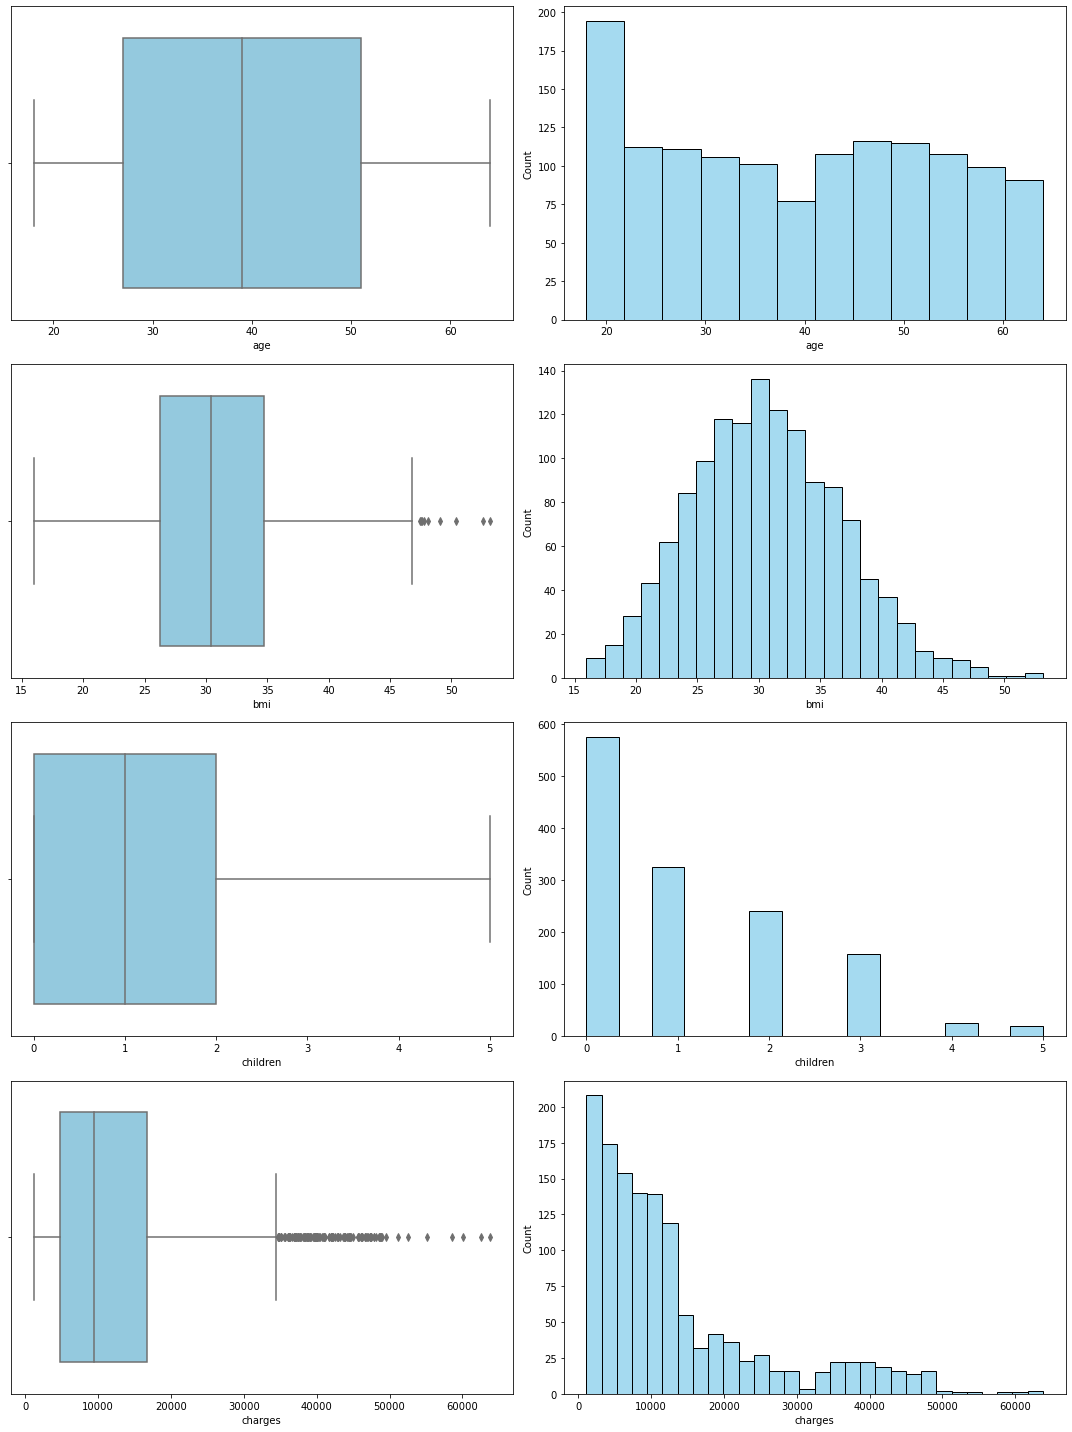

In [12]:
# Draw box plot and histogram for all numerical columns.
boxplot_histplot(dataframe = medical_dataframe, number_of_rows = 4, number_of_columns = 2, data_type = ["float64", "int64"])

**Observations**:
- Columns `age`, `bmi`, `children` and `charges` are skewed to right.
- Both columns `bmi` and `charges` have outliers.

**Categorical Columns**

In [13]:
# Store columns with object as data type.
object_columns = medical_dataframe.select_dtypes(include=['object']).columns

# Sort the columns in ascending order.
object_columns = object_columns.sort_values()

# Convert to list.
object_columns = list(object_columns)

# Loop through to count frequency of categories in each column of object_columns list.
for column_index in range(len(object_columns)):
    # Count frequency of categories in each column and assign to variable "value_count"
    value_count = medical_dataframe[object_columns[column_index]].value_counts()
    # Convert variable "value_count" to dataframe.
    value_count = pd.DataFrame(value_count, columns=[object_columns[column_index]])
    # Export dataframe to csv file.
    value_count = value_count.to_csv('./datasets/value_count_' + str(object_columns[column_index]) + '.csv', index = True) 

Histograms below were created using Tableau.

![image.png](./images/health_insurance_categorical_count.png)

**Observations**:
- Male's count is slightly higher than that of female.
- One-fifth of the insureds are smokers.
- Majority of the insureds reside in southeat region.

### Check for Multicollinearity

Numerical columns are investigated for multicollinearity.

In [14]:
# Function to draw correlation heatmap.
def correlation_heatmap(dataframe):
    
    # Establish size of figure.
    plt.figure(figsize=(15,15))

    # Find correlation of each column in dataframe.
    corr = dataframe.corr()

    # Set up mask to be "True" in the upper triangle.
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Create correlation heatmap, and masking the upper triangle for dataframe Test.
    sns.heatmap(corr, mask = mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
    plt.title('Correlation between Numerical Features', fontsize=10);

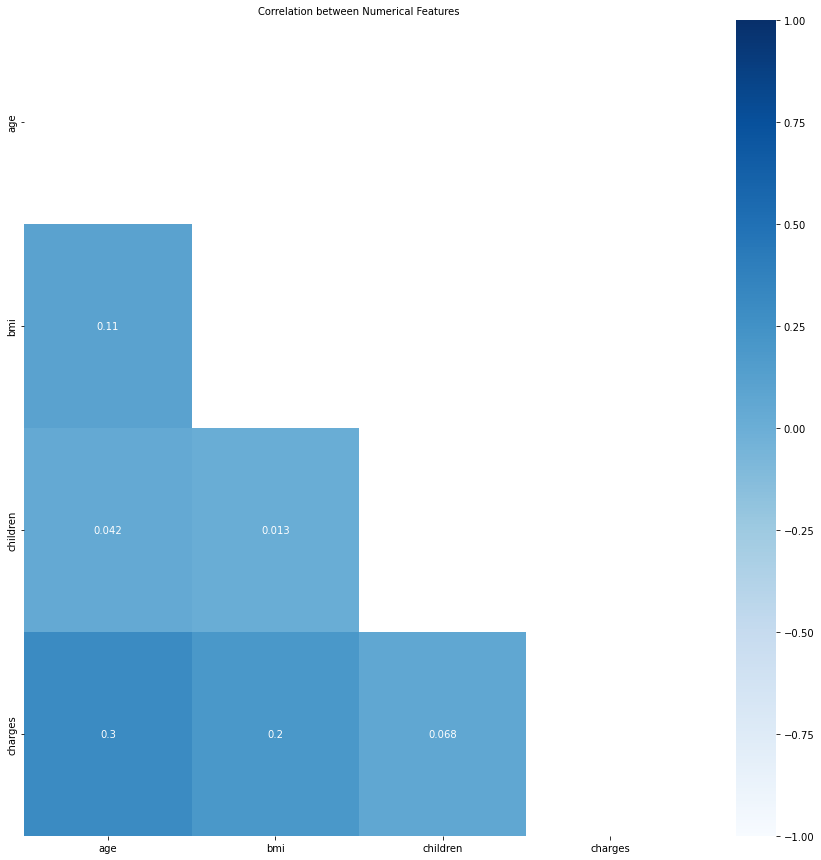

In [15]:
# Draw correlation heatmap.
correlation_heatmap(dataframe = medical_dataframe)

**Observation**:
- Based on Pearson's correlation coefficient ([source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient)), there is no cluster with strong positive correlation (coefficient is more than 0.5).     

# 2. Preprocessing

## Feature Engineering

### Create New Feature

New feature, `bmi_health_risk`, will be created to indicate if the insured bmi is at risk based on Healthhub BMI ranges ([source](https://www.healthhub.sg/live-healthy/410/Healthy%20Weight)).

In [16]:
col         = 'bmi'
conditions  = [medical_dataframe[col] >= 27.5, (medical_dataframe[col] < 27.5) & (medical_dataframe[col]>= 23), (medical_dataframe[col] < 23) & (medical_dataframe[col]>= 18.5), (medical_dataframe[col] < 18.4) & (medical_dataframe[col]>= 0)]
risk        = [ "high", 'moderate', 'normal', 'deficiency']
medical_dataframe["bmi_health_risk"] = np.select(conditions, risk, default=np.nan)
medical_dataframe

,age,sex,bmi,children,smoker,region,charges,bmi_health_risk
0,19,female,27.900,0,yes,southwest,16884.92400,high
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,high
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,high
1334,18,female,31.920,0,no,northeast,2205.98080,high
1335,18,female,36.850,0,no,southeast,1629.83350,high
1336,21,female,25.800,0,no,southwest,2007.94500,moderate


In [17]:
# Convert categorical data to numerical data using get_dummies.
# Set drop_first = True to exclude dummy variable for the first category of the variable.
medical_dataframe_dummified = pd.get_dummies(medical_dataframe, columns = ['sex', 'smoker', 'region', 'bmi_health_risk'], drop_first = True)

In [18]:
# Displays first 5 rows of dataframe.
medical_dataframe_dummified.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_health_risk_high,bmi_health_risk_moderate,bmi_health_risk_normal
0,19,27.900,0,16884.92400,0,1,0,0,1,1,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,0,1
4,32,28.880,0,3866.85520,1,0,1,0,0,1,0,0


In [19]:
# Displays last 5 rows of dataframe.
medical_dataframe_dummified.tail()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_health_risk_high,bmi_health_risk_moderate,bmi_health_risk_normal
1333,50,30.97,3,10600.5483,1,0,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,0,0,0,0,0,1,0,0
1335,18,36.85,0,1629.8335,0,0,0,1,0,1,0,0
1336,21,25.80,0,2007.9450,0,0,0,0,1,0,1,0
1337,61,29.07,0,29141.3603,0,1,1,0,0,1,0,0


### Select Features

All columns from medical_dataframe_dummified will be selected as features except `charges`.

In [20]:
# Drop "charges" and select the remaining columns as features. 
selected_features = medical_dataframe_dummified.drop(['charges'], axis=1)

# 3. Modelling

Medical pricing is a supervised learning problem, whose dependent variable (target variable or output) is numeric variable ([source](https://elitedatascience.com/machine-learning-algorithms)). Hence, these algorithms will be trained based on labeled dataset that has a numeric target variabl:

**(1) Regularized Linear Regression**<br>
- [Linear Regression](#Linear-Regression)<br>
- [Ridge](#Ridge)<br>
- [Lasso](#Lasso)<br>
- [Elastic Net](#ElasticNet)<br>

**(2) Regression Tree (Ensembles)**<br>
- [Random Forest](#Random-Forest)<br>
- [Decision Tree](#Decision-Tree)<br>
- [Extra Tree](#Extra-Tree)<br>
- [Adaptive Boosting](#Adaptive-Boosting)<br>
- [Gradient Boosting](#Gradient-Boosting)<br>

In this section, the following process will be carried out:
- [Set up Data for Modelling](#Set-up-Data-for-Modelling) <br>
- [Split Data into Training and Testing Sets](#Split-Data-into-Training-and-Testing-Sets) <br>
- [Create Baseline Model](#Baseline-Model) <br>
- [Create Benchmark Models](#Benchmark-Models) <br>
- [Hyper-parameter Tuning on Models](#Hyper-parameter-Tuning) <br>
- [Select Final Model](#Final-Model) <br>

#### Set up Data for Modelling

In [21]:
# `X` will be the `selected_features` columns.
# `y` will be the `fraud_reported` column.
X = selected_features
y = medical_dataframe_dummified['charges']

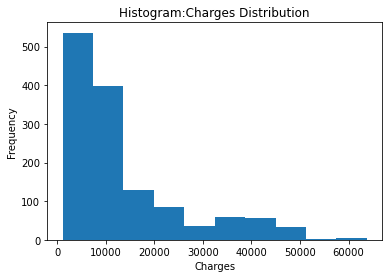

In [22]:
# Draw histogram to show distribution. 
plt.hist(y)
plt.ylabel("Frequency")
plt.xlabel("Charges")
plt.title("Histogram:Charges Distribution");

**Observation**:
- Charges are skewed to the right with most frequently occurred charges in a range that is less than 10,000.

#### Split Data into Training and Testing Sets

In [23]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,   # 30% of data is retained for testing.
                                                    random_state=42)

In [24]:
# Display shape of X_train and X_test.
# Print X_train shape.
print(f"X_train shape:", X_train.shape)
# Print X_test shape.
print(f"X_test shape:", X_test.shape)

X_train shape: (936, 11)
X_test shape: (402, 11)


In [25]:
# Display first 5 rows of X_train.
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_health_risk_high,bmi_health_risk_moderate,bmi_health_risk_normal
332,61,31.160,0,0,0,1,0,0,1,0,0
355,46,27.600,0,1,0,0,0,1,1,0,0
138,54,31.900,3,0,0,0,1,0,1,0,0
381,55,30.685,0,1,1,0,0,0,1,0,0
292,25,45.540,2,1,1,0,1,0,1,0,0


# Baseline Model

Baseline model serves as a baseline for comparison against new models.

In [26]:
# Create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')

# Fit a pipeline using standard scaler and dummy regressor
pipeline = make_pipeline(StandardScaler(), dummy_reg)

# Fit it on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Baseline RMSE:", "${:,.0f}".format(rmse))

Baseline RMSE: $12,114


#### Baseline Model Score

RMSE is the square root of the variance of the residuals (difference between observed value of health insurance premium and predicted value of health insurance premium). Hence, RMSE can be interpreted as the standard deviation of the unexplained variance. RMSE is a good measure of how accurately the model predicts health insurance premium with lower values of RMSE indicating better fit ([source](https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/#:~:text=As%20the%20square%20root%20of,the%20model%20predicts%20the%20response)).

As the goal of this project is to predict health insurance premium, RMSE at $12,114 is used as baseline.

# Benchmark Models

Models are run without cross validation and hyper-parameter tuning.

In [27]:
# Instantiate models
models = {'lr': LinearRegression(),
          'rg': Ridge(random_state=42),
          'ls': Lasso(random_state=42),
          'en': ElasticNet(random_state=42),
          'rf': RandomForestRegressor(random_state=42),
          'dt': DecisionTreeRegressor(random_state=42),
          'et': ExtraTreesRegressor(random_state=42),
          'ada': AdaBoostRegressor(random_state=42),
          'gb': GradientBoostingRegressor(random_state=42)
         }

In [28]:
# Instantiate lists to store results
init_list = []
gs_list = []

# Function to run model -- input scaler and model
def run_model(mod, grid_search=False, mod_params={}):

    # Initial dictionary to hold model results
    results = {}
    
    # Loading model
    model = mod

    # Fit a pipeline using standard scaler and model
    pipe = Pipeline([('ss', StandardScaler()), 
                         (mod, models[mod])])
    
    if grid_search:
        # Instantiate list to store gridsearch results
        gs = GridSearchCV(pipe, param_grid=mod_params, cv=10, verbose=1, n_jobs=-1)
        gs.fit(X_train, y_train)
        pipe = gs
    else:
        pipe.fit(X_train, y_train)
    
    # Prediction on training Data
    training_data_prediction = pipe.predict(X_train) 

    # Prediction on testing Data
    y_pred = pipe.predict(X_test)

    # Calculate R squared error - training
    r_squared_training = metrics.r2_score(y_train, training_data_prediction)

    # Calculate R squared error - test
    r_squared_test = metrics.r2_score(y_test, y_pred)

    # Display adjusted R squared - training
    adjusted_r2_training = 1 - (1-r_squared_training)*(len(y)-1)/(len(y)-X.shape[1]-1)

    # Display adjusted R squared - test
    adjusted_r2_test = 1 - (1-r_squared_test)*(len(y)-1)/(len(y)-X.shape[1]-1)

    # Calculate root mean squared error - training
    train_mse = mean_squared_error(y_train, training_data_prediction)
    train_rmse = np.sqrt(train_mse)

    # Calculate root mean squared error - test
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Retrieve metrics
    results['model'] = mod
    
    results['Adjusted R Squared Training'] = '{:.1%}'.format(adjusted_r2_training)
    results['Adjusted R Squared Test'] = '{:.1%}'.format(adjusted_r2_test)
    results['RMSE Training'] = '${:,.2f}'.format(train_rmse)
    results['RMSE Test'] = '${:,.2f}'.format(test_rmse)
    
    if grid_search:

        # Derive best parameters.
        print('***************************** Best Parameters *************************************')
        display(pipe.best_params_)

        # Display model metrics.
        print('********************************** Model Metrics **********************************')
        display(results)
        
        # Append model's metrics.
        gs_list.append(results)
    
    else: 
        print('********************************** Model Metrics **********************************')
        display(results)
    
        init_list.append(results)

### Linear Regression

In [29]:
# Run Linear Regression.
rf = run_model(mod="lr")

********************************** Model Metrics **********************************


{'model': 'lr',
 'Adjusted R Squared Training': '74.1%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,139.38',
 'RMSE Test': '$5,813.45'}

### Ridge

In [30]:
# Run Ridge.
rg = run_model(mod="rg")

********************************** Model Metrics **********************************


{'model': 'rg',
 'Adjusted R Squared Training': '74.1%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,139.40',
 'RMSE Test': '$5,813.27'}

### Lasso

In [31]:
# Run Lasso.
ls = run_model(mod="ls")

********************************** Model Metrics **********************************


{'model': 'ls',
 'Adjusted R Squared Training': '74.1%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,139.39',
 'RMSE Test': '$5,812.38'}

### ElasticNet

In [32]:
# Run ElasticNet.
en = run_model(mod="en")

********************************** Model Metrics **********************************


{'model': 'en',
 'Adjusted R Squared Training': '65.6%',
 'Adjusted R Squared Test': '67.6%',
 'RMSE Training': '$7,068.36',
 'RMSE Test': '$6,864.06'}

### Random Forest

In [33]:
# Run Random Forest.
rf = run_model(mod="rf")

********************************** Model Metrics **********************************


{'model': 'rf',
 'Adjusted R Squared Training': '97.6%',
 'Adjusted R Squared Test': '85.5%',
 'RMSE Training': '$1,861.13',
 'RMSE Test': '$4,585.05'}

### Decision Tree

In [34]:
# Run Decision Tree Regressor.
dt = run_model(mod="dt")

********************************** Model Metrics **********************************


{'model': 'dt',
 'Adjusted R Squared Training': '100.0%',
 'Adjusted R Squared Test': '69.7%',
 'RMSE Training': '$0.00',
 'RMSE Test': '$6,634.34'}

### Extra Tree

In [35]:
# Run Extra Trees Regressor.
et = run_model(mod="et")

********************************** Model Metrics **********************************


{'model': 'et',
 'Adjusted R Squared Training': '100.0%',
 'Adjusted R Squared Test': '82.7%',
 'RMSE Training': '$0.00',
 'RMSE Test': '$5,018.69'}

### Adaptive Boosting

In [36]:
# Run Adaptive Boosting.
ab = run_model(mod="ada")

********************************** Model Metrics **********************************


{'model': 'ada',
 'Adjusted R Squared Training': '84.7%',
 'Adjusted R Squared Test': '83.8%',
 'RMSE Training': '$4,721.48',
 'RMSE Test': '$4,852.45'}

### Gradient Boosting

In [37]:
# Run Gradient Tree Boosting.
gb = run_model(mod="gb")

********************************** Model Metrics **********************************


{'model': 'gb',
 'Adjusted R Squared Training': '90.4%',
 'Adjusted R Squared Test': '86.3%',
 'RMSE Training': '$3,736.74',
 'RMSE Test': '$4,458.08'}

In [38]:
# Results of initial modelling.
pd.DataFrame(init_list).sort_values(by='Adjusted R Squared Test', ascending=False).reset_index(drop=True)

,model,Adjusted R Squared Training,Adjusted R Squared Test,RMSE Training,RMSE Test
0,gb,90.4%,86.3%,"$3,736.74","$4,458.08"
1,rf,97.6%,85.5%,"$1,861.13","$4,585.05"
2,ada,84.7%,83.8%,"$4,721.48","$4,852.45"
3,et,100.0%,82.7%,$0.00,"$5,018.69"
4,lr,74.1%,76.8%,"$6,139.38","$5,813.45"
5,rg,74.1%,76.8%,"$6,139.40","$5,813.27"
6,ls,74.1%,76.8%,"$6,139.39","$5,812.38"
7,dt,100.0%,69.7%,$0.00,"$6,634.34"
8,en,65.6%,67.6%,"$7,068.36","$6,864.06"


**Observations**:
- Random Forest, Extra Tree and Decision Tree have overfitting issues.
- Gradient Boosting has highest adjusted r squared testing score at 86%.
- Extra Tree and Decision Tree have highest adjusted r squared testing score at 100%.

# Hyper-parameter Tuning

Models are run with cross validation and hyper-parameter tuning.

In [39]:
# Instantiate models
models = {'lr': LinearRegression(),
          'rg': Ridge(random_state=42),
          'ls': Lasso(random_state=42),
          'en': ElasticNet(random_state=42),
          'rf': RandomForestRegressor(random_state=42),
          'dt': DecisionTreeRegressor(random_state=42),
          'et': ExtraTreesRegressor(random_state=42),
          'ada': AdaBoostRegressor(random_state=42),
          'gb': GradientBoostingRegressor(random_state=42)
         }

### Linear Regression

In [40]:
# Run Linear Regression.
lr = run_model(mod="lr", grid_search=True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
***************************** Best Parameters *************************************


{}

********************************** Model Metrics **********************************


{'model': 'lr',
 'Adjusted R Squared Training': '74.1%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,139.38',
 'RMSE Test': '$5,813.45'}

### Ridge

In [41]:
rg_params = [{    
             # Trying different alphas
            'rg__alpha':[1e-3, 1e-2, 1e-1, 0.2, 0.25, 0.5, 0.75, 1.0, 2.0, 2.5, 5.0, 7.5, 10.0, 20.0, 25.0]}]

In [42]:
# Run Ridge.
rg = run_model(mod="rg",grid_search=True, mod_params=rg_params)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
***************************** Best Parameters *************************************


{'rg__alpha': 20.0}

********************************** Model Metrics **********************************


{'model': 'rg',
 'Adjusted R Squared Training': '74.0%',
 'Adjusted R Squared Test': '76.7%',
 'RMSE Training': '$6,143.73',
 'RMSE Test': '$5,817.68'}

### Lasso

In [43]:
ls_params = [{    
             # Trying different alphas
            'ls__alpha':[1e-3, 1e-2, 1e-1, 0.2, 0.25, 0.5, 0.75, 1.0, 2.0, 2.5, 5.0, 7.5, 10.0, 20.0, 25.0]}]

In [44]:
# Run Lasso.
ls = run_model(mod="ls", grid_search=True, mod_params=ls_params)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
***************************** Best Parameters *************************************


{'ls__alpha': 25.0}

********************************** Model Metrics **********************************


{'model': 'ls',
 'Adjusted R Squared Training': '74.0%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,141.07',
 'RMSE Test': '$5,803.83'}

### ElasticNet

In [45]:
en_params = [{    
             # Trying different alphas
            'en__alpha':[1e-3, 1e-2, 1e-1, 0.2, 0.25, 0.5, 0.75, 1.0, 2.0, 2.5, 5.0, 7.5, 10.0, 20.0, 25.0]}]

In [46]:
# Run ElasticNet.
en = run_model(mod="en", grid_search=True, mod_params=en_params)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
***************************** Best Parameters *************************************


{'en__alpha': 0.01}

********************************** Model Metrics **********************************


{'model': 'en',
 'Adjusted R Squared Training': '74.1%',
 'Adjusted R Squared Test': '76.8%',
 'RMSE Training': '$6,139.64',
 'RMSE Test': '$5,813.05'}

### Random Forest

In [47]:
rf_params = {'rf__n_estimators': [20, 25, 30, 35],
             'rf__max_depth': [20, 30, 40, 50],
             'rf__min_samples_leaf': [2, 3, 4, 5],
            }

In [48]:
# Run Random Forest.
rf = run_model(mod="rf", grid_search=True, mod_params=rf_params)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
***************************** Best Parameters *************************************


{'rf__max_depth': 20, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 35}

********************************** Model Metrics **********************************


{'model': 'rf',
 'Adjusted R Squared Training': '90.4%',
 'Adjusted R Squared Test': '87.0%',
 'RMSE Training': '$3,740.14',
 'RMSE Test': '$4,350.04'}

### Decision Tree

In [49]:
dt_params = {'dt__max_depth': [20, 30, 40, 50],
             'dt__min_samples_split': [1, 5, 10, 15],
             'dt__min_samples_leaf': [2, 3, 4, 5],
             }

In [50]:
# Run Decision Tree Regressor.
dt = run_model(mod="dt", grid_search=True, mod_params=dt_params)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
***************************** Best Parameters *************************************



160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    c

{'dt__max_depth': 20, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 15}

********************************** Model Metrics **********************************


{'model': 'dt',
 'Adjusted R Squared Training': '89.8%',
 'Adjusted R Squared Test': '83.7%',
 'RMSE Training': '$3,851.81',
 'RMSE Test': '$4,871.89'}

### Extra Tree

In [51]:
et_params = {'et__n_estimators': [20, 25, 30, 35],
             'et__max_depth': [20, 30, 40, 50],
             'et__min_samples_leaf': [2, 3, 4, 5],
            }

In [52]:
# Run Extra Trees Regressor.
et = run_model(mod="et", grid_search=True, mod_params=et_params)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
***************************** Best Parameters *************************************


{'et__max_depth': 20, 'et__min_samples_leaf': 4, 'et__n_estimators': 25}

********************************** Model Metrics **********************************


{'model': 'et',
 'Adjusted R Squared Training': '91.4%',
 'Adjusted R Squared Test': '86.9%',
 'RMSE Training': '$3,536.91',
 'RMSE Test': '$4,372.86'}

### Adaptive Boosting

In [53]:
ada_params = {'ada__n_estimators': [500, 1000],
              'ada__learning_rate': [0.9, 1.0],
             }

In [54]:
# Run Adaptive Boosting.
ab = run_model(mod="ada", grid_search=True, mod_params=ada_params)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
***************************** Best Parameters *************************************


{'ada__learning_rate': 0.9, 'ada__n_estimators': 500}

********************************** Model Metrics **********************************


{'model': 'ada',
 'Adjusted R Squared Training': '84.4%',
 'Adjusted R Squared Test': '83.6%',
 'RMSE Training': '$4,755.48',
 'RMSE Test': '$4,881.62'}

### Gradient Boosting

In [55]:
gb_params = {'gb__n_estimators': [500, 1000],
             'gb__learning_rate': [0.4, 0.5, 0.6],
}

In [56]:
# Run Gradient Tree Boosting.
gb = run_model(mod="gb", grid_search=True, mod_params=gb_params)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
***************************** Best Parameters *************************************


{'gb__learning_rate': 0.5, 'gb__n_estimators': 500}

********************************** Model Metrics **********************************


{'model': 'gb',
 'Adjusted R Squared Training': '99.6%',
 'Adjusted R Squared Test': '77.5%',
 'RMSE Training': '$745.38',
 'RMSE Test': '$5,715.84'}

In [57]:
gs_df = pd.DataFrame(gs_list)
gs_df.sort_values(by='Adjusted R Squared Test', ascending=False)

,model,Adjusted R Squared Training,Adjusted R Squared Test,RMSE Training,RMSE Test
4,rf,90.4%,87.0%,"$3,740.14","$4,350.04"
6,et,91.4%,86.9%,"$3,536.91","$4,372.86"
5,dt,89.8%,83.7%,"$3,851.81","$4,871.89"
7,ada,84.4%,83.6%,"$4,755.48","$4,881.62"
8,gb,99.6%,77.5%,$745.38,"$5,715.84"
0,lr,74.1%,76.8%,"$6,139.38","$5,813.45"
2,ls,74.0%,76.8%,"$6,141.07","$5,803.83"
3,en,74.1%,76.8%,"$6,139.64","$5,813.05"
1,rg,74.0%,76.7%,"$6,143.73","$5,817.68"


**Observations**:
- All models do not have overfitting issues, except Gradient Boosting.
- Random Forest has the highest adjusted r squared testing at 87% and lowest RMSE testing at \$4,350.
- Extra Tree has the highest adjusted r squared training score at 91.4%, second highest adjusted r squared testing score at 86.9%, second lowest RMSE training and testing at \$3,536.91 and \\$4,372.86 respectively.
- Linear Regression has adjusted r squared training and  testing scores at 74.1% and 76.8% respectively; and RMSE training and testing at \$6,139.38 and \\$5,813.45.

## Final Model

Random Forest is chosen as the final model as Random Forest
- is not overfitting;
- has highest adjusted r squared testing at 87%;
- has lowest RMSE testing at \$4,350 and third lowest RMSE training at \\$3,740, that is lower than that of baseline model.

### Features Importance in Random Forest Modelling

In [58]:
def run_model(model, mod_params={}):
    
    # Train model
    model.fit(X_train, y_train)
    
    # Create dataframe table to store attribute and importance
    importances = pd.DataFrame(data={'Attribute': X_train.columns, 'Importance': model.feature_importances_})
    importances = importances.sort_values(by='Importance', ascending=False)
        
    # Plot Bar Diagram to show features importance.
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='blue')
    plt.title('Random Forest Regressor: Feature Importances obtained from Coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

In [59]:
# Instantiate models
models = {'rf': RandomForestRegressor(random_state=42)}

In [60]:
# Define parameters.
rf_params = {'rf__n_estimators': [35],
             'rf__max_depth': [20],
             'rf__min_samples_leaf': [5],
            }

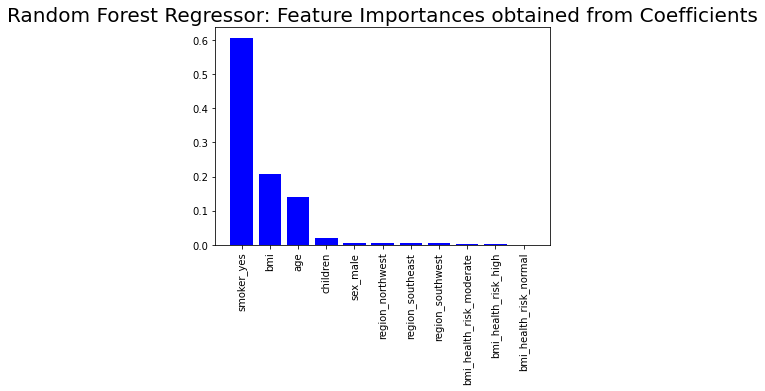

In [61]:
# Run Random Forest.
rf = run_model(model = RandomForestRegressor(random_state=42), mod_params=rf_params)

**Observation**:
- `smoker_yes`, `bmi` and `age` are 3 most important features that help random forest regressor in predicting health insurance premium.

## 4. Conclusion

Random Forest is chosen as the final model as Random Forest
- is not overfitting;
- has highest adjusted r squared testing at 87%;
- has lowest RMSE testing at \$4,350 and third lowest RMSE training at \\$3,740, that is lower than that of baseline model.

This model helps to predict health insurance charges.

# 5. Recommendations

These are the limitations observed:
- dataset is small with 7 columns and 1,338 rows;
- results generalizability limited to United States;
- no information on the source of data, whether it is from one insurance company, a few companies or more; and
- Random Forest Regressor model is prone to overfitting because it can keep branching until it memorizes the training data ([source](https://elitedatascience.com/machine-learning-algorithms#regression)).

For future improvement, it is recommended to continuous training and improving model with more data.